# Homework 3

For this homework, you will be working extensively in tensorflow. It is suggested that you spin up a Google Cloud VM with a GPU attached. Remember, instructions for doing so are found in Homework 0.

### Part 1: Homework 2, but on tensorflow
### Part 2: DNN on MNIST and CIFAR10
### Part 3: VGG on MNIST and CIFAR10
### (Optional) Part 4, getting state of the art (#SOTA)


# Part 1
You don't have to repeat everything in homework 2, but rather pick one set of two features that worked well for you last homework, and implement logistic regression using tensorflow without using keras (you will practice using keras in parts 2 and 3). In other words, using tensorflow operations, please create a scalar-value loss function and let tensorflow create the training operation for logistic regression, which automatically computes the gradients and updates the weight parameters. Note that the logistic loss is a special case of the softmax cross entropy loss that you've seen when classifying MNIST.

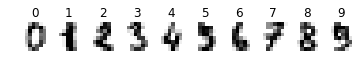

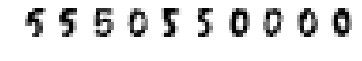

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 0 Loss =  1.1651707
Epoch 100 Loss =  1.0751027
Epoch 200 Loss =  0.999859
Epoch 300 Loss =  0.9379994
Epoch 400 Loss =  0.8876821
Epoch 500 Loss =  0.8469317
Epoch 600 Loss =  0.81386113
Epoch 700 Loss =  0.7868104
Epoch 800 Loss =  0.7644024
Epoch 900 Loss =  0.7455418
Epoch 1000 Loss =  0.7293821
Epoch 1100 Loss =  0.7152818
Epoch 1200 Loss =  0.70276105
Epoch 1300 Loss =  0.6914632
Epoch 1400 Loss =  0.6811243
Epoch 1500 Loss =  0.67154944
Epoch 1600 Loss =  0.6625937
Epoch 1700 Loss =  0.6541498
Epoch 1800 Loss =  0.6461375
Epoch 1900 Loss =  0.63849586
Epoch 2000 Loss =  0.63117933
Epoch 2100 Loss =  0.6241524
Epoch 2200 Loss =  0.6173875
Epoch 2300 Loss =  0.61086285
Epoch 2400 Loss =  0.60456085
Epoch 2500 Loss =  0.5984672
Epoch 2600 Loss =  0.5925696
Epoch 2700 Loss =  0.5868578
Epoch 2800 Loss =  0.58132297
Epoch 2900 Loss =  0.575957
Epoch 3000 Loss 

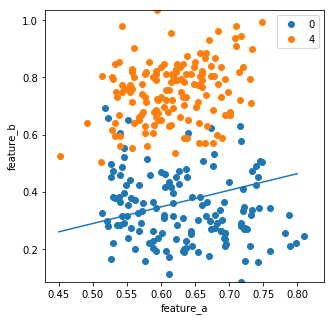

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Import datasets
%matplotlib inline
from sklearn import datasets
digits = datasets.load_digits()
for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()


# Split the datasets
from sklearn.model_selection import train_test_split
from numpy.linalg import norm
number_a = 0 # TODO choose your digit
number_b = 5 # TODO choose your digit

digit_a_indexes = np.where(digits.target==number_a)   #return elements where the target is a or b
digit_b_indexes = np.where(digits.target==number_b)
targets = np.concatenate((digits.target[digit_a_indexes], digits.target[digit_b_indexes]))
images = np.concatenate((digits.images[digit_a_indexes], digits.images[digit_b_indexes]))
#images are train features; while targets are labels; test_size of the portion of images used as test set
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2, random_state=42)
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()


# Feature extraction
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):  # first feature is to count the non-zero pixels numbers
        '''compute_feature_a will compute ...'''
        flat_img=image.reshape(-1)
        int_img=sum(abs(flat_img))/500
        return int_img

    def compute_feature_b(image):  #second feature is its symmetry
        '''compute_feature_b will compute ...'''
        image_flip=np.flip(image,0)
        sym_img=sum(sum(abs(image_flip-image)))/350
        
        #sym_img0 = np.sum(np.sum(image[:,3:4]))  # Calculate total intensity of the middle two columns
        #sym_img=sym_img0/120

        return sym_img
    
    return compute_feature_a(image), compute_feature_b(image)


# Apply and plot your features

X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_features_a = X_features[np.where(y_train==number_a)]  #number is 0
X_features_b = X_features[np.where(y_train==number_b)]  #number is 4

# Use tensorflow for logistic regression 
logistic_y = np.copy(y_train)
logistic_y[y_train == number_a] = 0  #reset the labels to 0 to 1
logistic_y[y_train == number_b] = 1
log_y=logistic_y.reshape([288, 1])

# define normalize data
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(X_features)
#print(np.shape(train_X))



# declare the variable
# b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
# Define placeholders
Theta = tf.Variable(tf.random_normal(shape=[2, 1])) 
data = tf.constant(train_X,dtype=tf.float32,name='a') #two features
target = tf.constant(log_y,dtype=tf.float32,name='b')  # labels
#data = tf.placeholder(dtype=tf.float32, shape=[None, 2],name="data") #two features
#target = tf.placeholder(dtype=tf.float32, shape=[None, 1],name="target")  # labels
y_pred = tf.matmul(data, Theta)


# Define loss function
loss = tf.losses.sigmoid_cross_entropy(target,y_pred)
# define parameters
learning_rate = 0.012
iter_num = 4000
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
goal = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(iter_num):
        if epoch % 100==0:
            print("Epoch",epoch,"Loss = ", loss.eval())
        sess.run(goal) 
    Best_theta=Theta.eval()
print(Best_theta)

plt.figure(figsize=(5,5))
plt.scatter(X_features_a[:, 0], X_features_a[:, 1], label='0')
plt.scatter(X_features_b[:, 0], X_features_b[:, 1], label='4')
#plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
#plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())
plt.legend(loc='best')
x1points=np.linspace(0.45,0.8,100)
coeff=-Best_theta[0]/Best_theta[1]
linex2=coeff*x1points
plt.plot(x1points,linex2)

# Part 2:  DNN on MNIST and CIFAR10 (see file named Part2-DNN)

In our lab, you guys saw how to work with the MNIST dataset to perform image classification. We can attempt the MNIST classification problem with just fully connected layers. This means we will be optimizing for non-banded matrices (no convolutions).

1. Calcualte the number of weight parameters you are optimizing for 1, 2 and 3 differen fully connected layers (the total size of each layer is up to you).

Answer: There will be 78500 paramaters for one layer (softmax),  88600 parameters for two layers (ReLu and softmax), 98700 for three layers.

2. What is the max layer depth you can go before training loss does not converge? You can usually tell that something is not converging by examining the training loss vs. iteration curve.

Answser: when set the epoch to be 5, the max layer depth is before training loss does not converge is 5. Figure attached below.

3. How does the number of parameters relate to the training loss and validation/test loss? Try to get a few data points to speak to this question.
3. Keeping the maximum number of parameters possible while still maintaining convergence (i.e., a good training and validation/test loss), what happens when you swap the activation function to `tanh` instead of `relu`? How about `sigmoid`?
4. After exploring the above, train a DNN model with the combination of hyperparameters that you believe will work best on MNIST.
5. Using the same architecture, try training a DNN model on more difficult dataset such as Fashion MNIST or CIFAR10/100. Example download instructions are shown in the next problem.

### Must haves
1. Make a curve of the final validation/test loss of your DNN after the loss plateaus as a function of the number of weight parameters used (final loss versus # parameters used). Note that you might see something like the curve below for a low number of parameters, but as the number of parameters increases, it will not look like this plot. 
2. On the same figure, make the same curve as above, but use different activation functions in your architecture.
3. Plot a point corresponding to your crafted DNN archiecture for question 4.
4. Repeat 1-3 for CIFAR10

The curves when reasonable # params are used look like the below
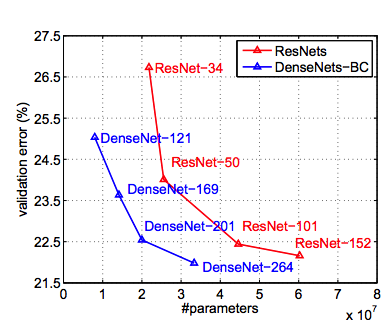

# Data set MNIST

Training data shape (60000, 28, 28, 1)


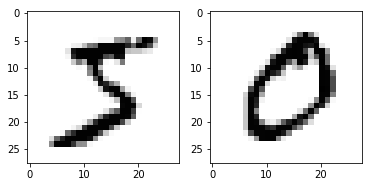

In [27]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import numpy as np
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()#cifar10
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #32 by 32
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Greys);

def Model_para(num_layer=1,input_dim=(28, 28, 1),activation='relu',epoch=10, early_stop_flag=False,verb=0):
    # define layers for the model
    para_count=0 
    Loss_Value=0
    model = Sequential()
    model.add(Flatten(input_shape=input_dim))
    for i in range(num_layer):
        model.add(Dense(100,activation=activation))
    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
# complie is when you set all pipes in place and can not change it after compile
    model.summary()
    para_count=model.count_params()
    early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2,verbose=0, mode='auto') 
    if early_stop_flag:   
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val),callbacks=[early_stop])
    else:
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val))
    Loss_total=hist.history['val_acc']
    #Loss_Value=hist.history['val_loss'][-1]
    Loss_Value=min(Loss_total)
    return para_count,Loss_total,Loss_Value, num_layer,model

model=tf.keras.Sequential{[]}
model.add(tf.keras,layers.Flatten{input_stape={32,32,3}})

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_53 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_320 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_321 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_54 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_322 (Dense)            (None, 100)               78500     
_________________________________________________________________
de

[ 79510.  99710. 119910. 140110. 160310. 180510.]
[29.07999754 28.14999819  3.89999747  3.21999788  3.15999985  2.92999744]
1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_59 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_362 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_363 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_60 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_364 

[ 79510.  99710. 119910. 140110. 160310. 180510.]
[10.18999815  9.42000151  9.58999991  9.09000039 11.83000207 12.43000031]
1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_65 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_404 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_405 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_66 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_406 

[ 79510.  99710. 119910. 140110. 160310. 180510.]
[ 8.09999704  8.37000012 10.44999957 13.05999756 23.0799973  33.56999755]


Text(0, 0.5, 'Validation Error(%)')

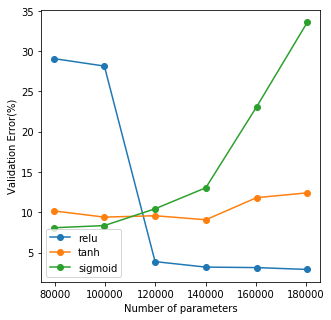

In [16]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
num=[1,3,5,7,9,11]
activation=['relu','tanh','sigmoid']
plt.figure(figsize=(5,5))
# use relu as the activation
for act in activation:
    #index_act=activation.index(act)
    para_num=[]
    Loss=[]
    layer_num=[]
    #cvscores =[]
    for num_layer in num:
        print(num_layer)
        index_layer=num.index(num_layer)
        para_count,Loss_total, Loss_Value, num_layer,model=Model_para(num_layer,
                                                       input_dim=(28, 28, 1),activation=act,
                                                       epoch=5, early_stop_flag=False,verb=0)
        #scores = Model.evaluate(model,X_val, y_val, verbose=0)
        
        para_num=np.append(para_num,para_count)
        Loss=np.append(Loss,Loss_Value*100)
        layer_num=np.append(layer_num,num_layer)
        #cvscores=np.append(cvscores,100-scores[1] * 100)
        del para_count, Loss_Value, num_layer,model,Loss_total
    plt.plot(para_num,Loss,'o-',label=act)
    plt.legend(loc='best')
    print(para_num)
   # print(cvscores)
    del para_num,Loss,layer_num

plt.xlabel('Number of parameters')
plt.ylabel('Validation Error(%)')

In [28]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
para_count, Loss_total, Loss_Value, num_layer,model=Model_para(num_layer=7,
                                                       input_dim=(28, 28, 1),activation='relu',
                                                       epoch=30, early_stop_flag=True,verb=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_73 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_462 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_463 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_464 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_465 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_466 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_467 (Dense)            (None, 100)               10100     
__________

[0.20064982606768608, 0.14480345013737678, 0.15955820659399034, 0.1317057098686695, 0.1292474483937025, 0.11856933975815773, 0.11337069429904223, 0.10995001803040505, 0.12108073749989272, 0.10141707876587752, 0.12595508366492578, 0.1100420391149819]


Text(0, 0.5, 'Loss')

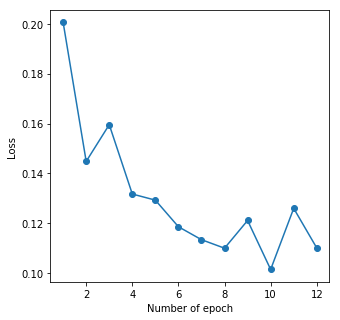

In [29]:
#plt.figure(figsize=(5,5))
#plt.plot(para_num,Loss_total,'o-',label=act)
print(Loss_total)
plt.figure(figsize=(5,5))
epochnum=np.arange(1, 13)
plt.plot(epochnum,Loss_total,'o-')
#print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Loss')

# Dataset CIFAR10

Training data shape (50000, 32, 32, 3)


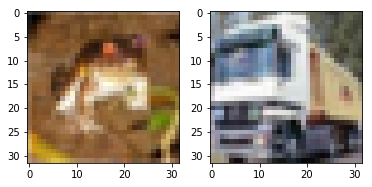

In [36]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import numpy as np
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()#cifar10
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3) #32 by 32
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32,3), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(32, 32,3), cmap=plt.cm.Greys);

def Model_para(num_layer=1,input_dim=(32, 32, 3),activation='relu',epoch=10, early_stop_flag=False,verb=0):
    # define layers for the model
    para_count=0 
    Loss_Value=0
    model = Sequential()
    model.add(Flatten(input_shape=input_dim))
    for i in range(num_layer):
        model.add(Dense(100,activation=activation))
    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
# complie is when you set all pipes in place and can not change it after compile
    model.summary()
    para_count=model.count_params()
    early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2,verbose=0, mode='auto') 
    if early_stop_flag:   
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val),callbacks=[early_stop])
    else:
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val))
    Loss_total= hist.history['val_loss']  
    Loss_Value=min(Loss_total)
    return para_count, Loss_total, Loss_Value, num_layer,model

1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_80 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_494 (Dense)            (None, 100)               307300    
_________________________________________________________________
dense_495 (Dense)            (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_81 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_496 (Dense)            (None, 100)               307300    
_________________________________________________________________


[308310. 328510. 348710. 368910. 389110. 409310.]
[89.99999985 89.99999985 89.99999985 89.99999985 61.71999872 64.12999928]
1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_86 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_536 (Dense)            (None, 100)               307300    
_________________________________________________________________
dense_537 (Dense)            (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_87 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_53

[308310. 328510. 348710. 368910. 389110. 409310.]
[89.99999985 89.99999985 89.99999985 89.99999985 89.99999985 89.99999985]
1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_92 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_578 (Dense)            (None, 100)               307300    
_________________________________________________________________
dense_579 (Dense)            (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_93 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_58

[308310. 328510. 348710. 368910. 389110. 409310.]
[89.99999985 89.99999985 89.99999985 89.99999985 89.99999985 89.99999985]


Text(0, 0.5, 'Validation Error(%)')

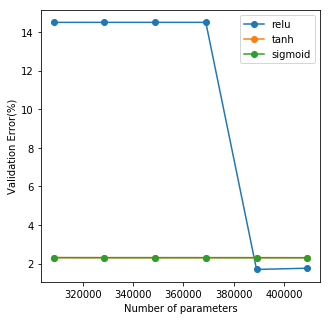

In [33]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
num=[1,3,5,7,9,11]
activation=['relu','tanh','sigmoid']
plt.figure(figsize=(5,5))
# use relu as the activation
for act in activation:
    #index_act=activation.index(act)
    para_num=[]
    Loss=[]
    layer_num=[]
   # cvscores =[]
    for num_layer in num:
        print(num_layer)
        index_layer=num.index(num_layer)
        para_count,Loss_total, Loss_Value, num_layer,model=Model_para(num_layer,
                                                       input_dim=(32, 32, 3),activation=act,
                                                       epoch=5, early_stop_flag=False,verb=0)
       # scores = Model.evaluate(model,X_val, y_val, verbose=0)
        
        para_num=np.append(para_num,para_count)
        Loss=np.append(Loss,Loss_Value*100)
        layer_num=np.append(layer_num,num_layer)
      #  cvscores=np.append(cvscores,100-scores[1] * 100)
        del para_count, Loss_Value, num_layer,model,Loss_total
    plt.plot(para_num,Loss,'o-',label=act)
    plt.legend(loc='best')
    print(para_num)
   # print(cvscores)
    del para_num,Loss,layer_num

plt.xlabel('Number of parameters')
plt.ylabel('Validation Error(%)')


In [37]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
para_count, Loss_total, Loss_Value, num_layer,model=Model_para(num_layer=9,
                                                       input_dim=(32, 32, 3),activation='relu',
                                                       epoch=30, early_stop_flag=True,verb=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_99 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_630 (Dense)            (None, 100)               307300    
_________________________________________________________________
dense_631 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_632 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_633 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_634 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_635 (Dense)            (None, 100)               10100     
__________

[1.983829023742676, 1.7193327821731568, 1.7379635864257812, 1.7281158853530885]


Text(0, 0.5, 'Loss')

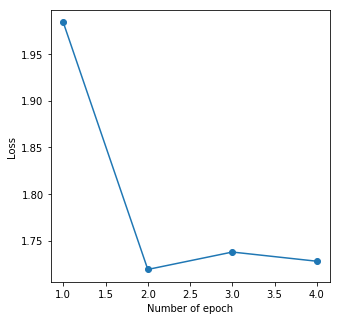

In [38]:
#plt.figure(figsize=(5,5))
#plt.plot(para_num,Loss_total,'o-',label=act)
print(Loss_total)
plt.figure(figsize=(5,5))
epochnum=np.arange(1, 5)
plt.plot(epochnum,Loss_total,'o-')
#print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Loss')

# Part 3. VGG on CIFAR100 and CIFAR10

VGG is a simple, but powerful CNN created in 2015. Read the VGG paper here: https://arxiv.org/pdf/1409.1556.pdf

Here, we're going to try to reproduce the model's findings on the cifar10 and cifar100 dataset. Note that the paper takes 224 x 224 images, but cifar10 and 100 are only 32 x 32 images.

1. Implement all of the layers for the VGG ConvNet Configuration A. Please use the shell code below as guide. Then, train this network on the Cifar10 and Cifar100 datasets.
2. For Cifar10 and 100, VGG is probably overkill. Try changing the number of layers and number of filters without sacrificing too much performance accuracy. How many filters can you get rid of before you see the accuracy drop by more than 2%? Where in the architecture is it better to remove filters - towards the input layers, or more towards the output layers?
3. For what you experiment with--report the parameter, validation loss curves for changing the number of i) layers, ii) filter size, iii) both.

# (Optional) Part 4, state of the art

Currently, state of the art implementations in the image classification problem are DenseNet: (https://arxiv.org/abs/1608.06993), ResNet (https://arxiv.org/abs/1512.03385), and ResNext (https://arxiv.org/pdf/1611.05431.pdf). Try implementing and training one of these on the cifar10 and cifar100 dataset. Feel free to experiment.

Jargon to learn about
1. What is "residual learning"?
2. What is a "bottleneck layer"?
3. What is a "dense block"?